Dataset Loaded Successfully

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   

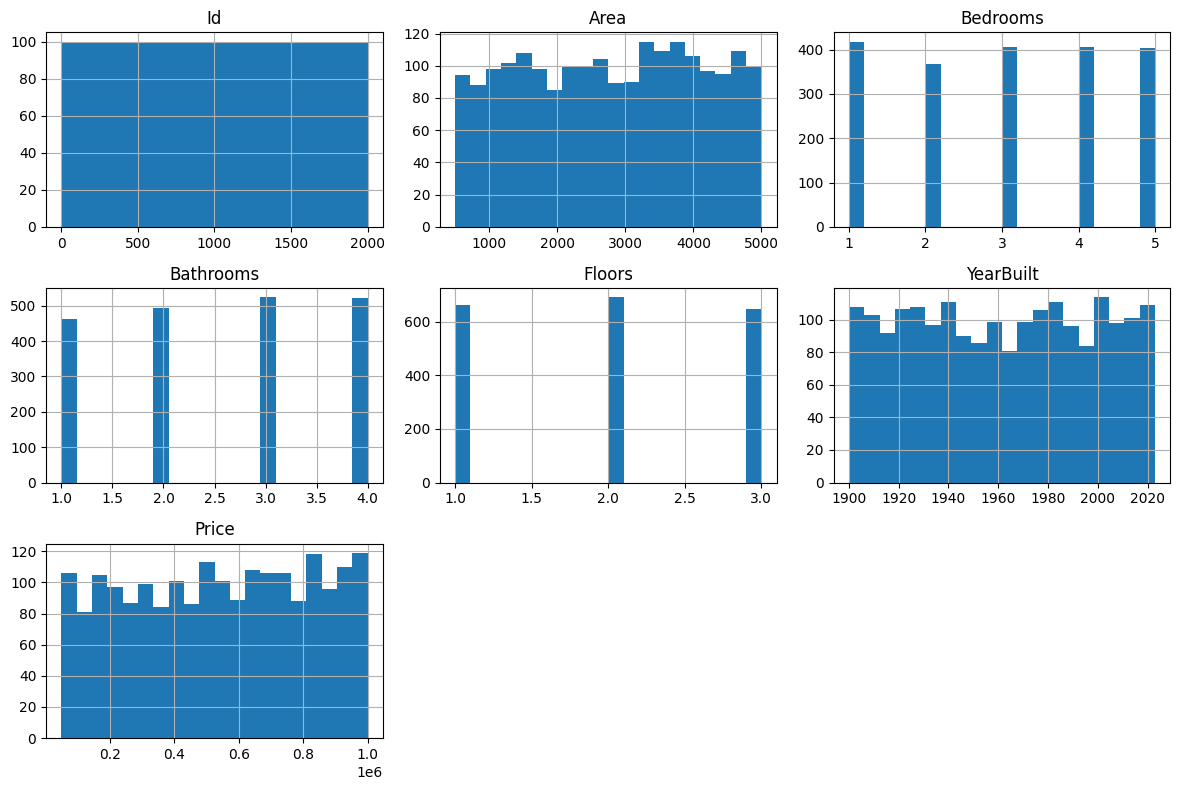

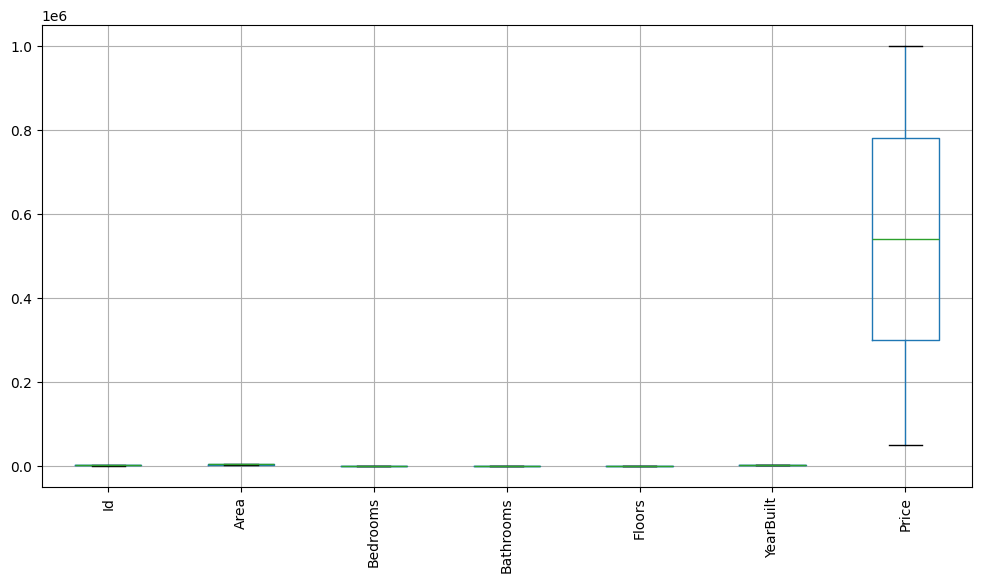

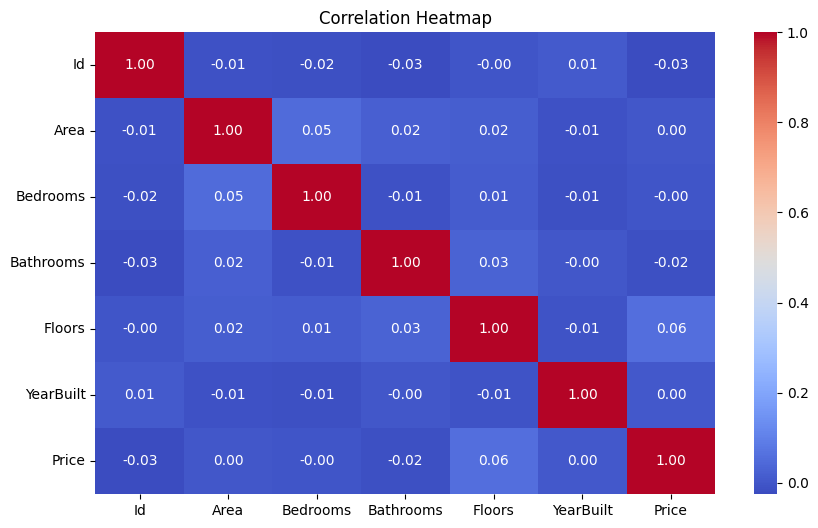


Correlation with Price:
Price        1.000000
Floors       0.055890
YearBuilt    0.004845
Area         0.001542
Bedrooms    -0.003471
Bathrooms   -0.015737
Id          -0.025643
Name: Price, dtype: float64

Selected Features: ['Floors', 'YearBuilt', 'Area', 'Bedrooms', 'Bathrooms']

Model Evaluation Results:
MAE  : 244587.19991978563
MSE  : 78789724000.8846
RMSE : 280695.0729900413
R² Score: -0.01273663755401877

Model Coefficients:
Floors : 18961.047331717917
YearBuilt : 4034.1406581329484
Area : -464.1243588352909
Bedrooms : 32.47948915890697
Bathrooms : -11036.634812339113

Training Completed Successfully!


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("House Price Prediction Dataset.csv")
print("Dataset Loaded Successfully\n")
print(df.head())

 CHECK DATA INFO

print("\nDataset Info:")
print(df.info())

print("\nChecking Missing Values:")
print(df.isnull().sum())

 --------------------------------------
 HANDLE MISSING VALUES
 --------------------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

 --------------------------------------
 REMOVE DUPLICATES
 --------------------------------------
df = df.drop_duplicates()

# --------------------------------------
# DESCRIPTIVE STATISTICS
# --------------------------------------
print("\nStatistical Summary:")
print(df.describe())

 --------------------------------------
 VISUALIZATION SECTION
 --------------------------------------
 Histogram
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

 --------------------------------------
 CORRELATION HEATMAP (FIXED)
 --------------------------------------
plt.figure(figsize=(10, 6))

 Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

 --------------------------------------
 --------------------------------------
 FEATURE SELECTION (FIXED)
 --------------------------------------

 Remove extra spaces in column names (important fix)
df.columns = df.columns.str.strip()

target = "Price"

# Check if target exists
if target not in df.columns:
    raise ValueError(f"Column '{target}' not found in dataset")

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Ensure target is numeric
if target not in numeric_df.columns:
    raise ValueError(f"Target column '{target}' is not numeric")

# Correlation with target
corr_values = numeric_df.corr()[target].sort_values(ascending=False)

print("\nCorrelation with Price:")
print(corr_values)

# Select top 5 features excluding target
features = corr_values.drop(target).head(5).index.tolist()

print("\nSelected Features:", features)

 --------------------------------------
 TRAIN-TEST SPLIT
 --------------------------------------
X = numeric_df[features]
y = numeric_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 --------------------------------------
 SCALING
 --------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 --------------------------------------
 TRAIN MODEL
 --------------------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

 --------------------------------------
 PREDICT
 --------------------------------------
y_pred = model.predict(X_test_scaled)

 --------------------------------------
 EVALUATION
 --------------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R² Score:", r2)

 --------------------------------------
 COEFFICIENTS
 --------------------------------------
print("\nModel Coefficients:")
for col, coef in zip(features, model.coef_):
    print(col, ":", coef)

print("\nTraining Completed Successfully!")

